In [3]:
import os
import time
import numpy as np
import pandas as pd
DATADIR = 'D:/W210_Capstone/co2-storage-fall2021/data/'
os.chdir(DATADIR)
wells = pd.read_csv(r'./CalGEM_ProInj_FracTracker_8.5.21.csv', engine='python')


In [4]:
wells.shape

(293115, 443)

In [6]:
wells.columns

Index(['OldAPI', 'OldAPI_ID', 'Updated_API', 'API_ID', 'LeaseName',
       'WellNumber', 'WellStatus_10.30.19', 'WellType_10.30.19',
       'Operatorcode', 'OperatorName',
       ...
       'FAP_Code_2019', 'Status2019', 'OilorCondensateProduced_2020',
       'GasProduced_2020', 'WaterProduced_2020', 'DaysProducing_2020',
       'MaxCasingPressure_2020', 'APIGravityofOil_2020', 'FAP_Code_2020',
       'Status2020'],
      dtype='object', length=443)

In [5]:
wells.API_ID.count()

243084

In [6]:
wells2 = wells[wells['API_ID'].notna()]

In [7]:
wells2.shape

(243084, 443)

In [8]:
wells2.columns

Index(['OldAPI', 'OldAPI_ID', 'Updated_API', 'API_ID', 'LeaseName',
       'WellNumber', 'WellStatus_10.30.19', 'WellType_10.30.19',
       'Operatorcode', 'OperatorName',
       ...
       'FAP_Code_2019', 'Status2019', 'OilorCondensateProduced_2020',
       'GasProduced_2020', 'WaterProduced_2020', 'DaysProducing_2020',
       'MaxCasingPressure_2020', 'APIGravityofOil_2020', 'FAP_Code_2020',
       'Status2020'],
      dtype='object', length=443)

In [10]:
# matching = [s for s in some_list if "abc" in s]
oils = [ o for o in wells2.columns if 'Gas' in o ]
print(*oils)

TotalGas_77 TotalGas_78 TotalGas_79 TotalGas_80 TotalGas_81 TotalGas_82 TotalGas_83 TotalGas_84 TotalGas_85 TotalGas_86 TotalGas_87 TotalGas_88 TotalGas_89 TotalGas_90 TotalGas_91 TotalGas_92 TotalGas_93 TotalGas_94 TotalGas_95 TotalGas_96 TotalGas_97 TotalGas_98 TotalGas_99 TotalGas_00 TotalGas_01 TotalGas_02 TotalGas_03 TotalGas_04 TotalGas_05 TotalGas_06 TotalGas_07 TotalGas_08 TotalGas_09 TotalGas_10 TotalGas_11 TotalGas_12 TotalGas_13 TotalGas_14 Gas_Inj_14 TotalGas_15 Gas_Inj_15 TotalGas_16 Gas_Inj_16 TotalGas_17 Gas_Inj_17 TotalGas_18 GasAirInjected_2018 GasProduced_2019 GasProduced_2020


In [11]:
totaloil_cols = [ o for o in wells2.columns if 'TotalOil' in o ]
totaloil_cols.append('OilorCondensateProduced_2019')
totaloil_cols.append('OilorCondensateProduced_2020')
print(*totaloil_cols)
wells2['alloil'] = wells2.loc[:, totaloil_cols].sum(axis=1)

TotalOil_77 TotalOil_78 TotalOil_79 TotalOil_80 TotalOil_81 TotalOil_82 TotalOil_83 TotalOil_84 TotalOil_85 TotalOil_86 TotalOil_87 TotalOil_88 TotalOil_89 TotalOil_90 TotalOil_91 TotalOil_92 TotalOil_93 TotalOil_94 TotalOil_95 TotalOil_96 TotalOil_97 TotalOil_98 TotalOil_99 TotalOil_00 TotalOil_01 TotalOil_02 TotalOil_03 TotalOil_04 TotalOil_05 TotalOil_06 TotalOil_07 TotalOil_08 TotalOil_09 TotalOil_10 TotalOil_11 TotalOil_12 TotalOil_13 TotalOil_14 TotalOil_15 TotalOil_16 TotalOil_17 TotalOil_18 OilorCondensateProduced_2019 OilorCondensateProduced_2020


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
totalgas_cols = [ o for o in wells2.columns if 'TotalGas' in o ]
totalgas_cols.append('GasProduced_2019')
totalgas_cols.append('GasProduced_2020')
print(*totalgas_cols)
wells2['allgas'] = wells2.loc[:, totalgas_cols].sum(axis=1)

TotalGas_77 TotalGas_78 TotalGas_79 TotalGas_80 TotalGas_81 TotalGas_82 TotalGas_83 TotalGas_84 TotalGas_85 TotalGas_86 TotalGas_87 TotalGas_88 TotalGas_89 TotalGas_90 TotalGas_91 TotalGas_92 TotalGas_93 TotalGas_94 TotalGas_95 TotalGas_96 TotalGas_97 TotalGas_98 TotalGas_99 TotalGas_00 TotalGas_01 TotalGas_02 TotalGas_03 TotalGas_04 TotalGas_05 TotalGas_06 TotalGas_07 TotalGas_08 TotalGas_09 TotalGas_10 TotalGas_11 TotalGas_12 TotalGas_13 TotalGas_14 TotalGas_15 TotalGas_16 TotalGas_17 TotalGas_18 GasProduced_2019 GasProduced_2020


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
wells2.head(10)

,OldAPI,OldAPI_ID,Updated_API,API_ID,LeaseName,WellNumber,WellStatus_10.30.19,WellType_10.30.19,Operatorcode,OperatorName,...,GasProduced_2020,WaterProduced_2020,DaysProducing_2020,MaxCasingPressure_2020,APIGravityofOil_2020,FAP_Code_2020,Status2020,alloil,allgas,gas2co2
0,411104475.0,11104475.0,411104475.0,11104475.0,Taylor,18,Plugged,OG,A0610,Aera Energy LLC,...,NaN,NaN,NaN,NaN,NaN,NaN,Plugged,0.00000,0.00000,0.000000
1,401906438.0,1906438.0,401906438.0,1906438.0,0,?,#REF!,OG,C6400,Coast Range Oil Co.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.000000
2,401906487.0,1906487.0,401906487.0,1906487.0,Ward,OLD 3,#REF!,OG,C5640,Chevron U.S.A. Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.000000
3,402932860.0,2932860.0,402932860.0,2932860.0,0,4,#REF!,DH,C5640,Chevron U.S.A. Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.000000
4,402932892.0,2932892.0,402932892.0,2932892.0,Quinby,460D,Plugged,CH,C5640,Chevron U.S.A. Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.000000
5,402932950.0,2932950.0,402932950.0,2932950.0,Giant,344D,Plugged,CH,C5640,Chevron U.S.A. Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,Plugged,0.00000,0.00000,0.000000
6,402932952.0,2932952.0,402932952.0,2932952.0,Del Monte,393D,Plugged,CH,C5640,Chevron U.S.A. Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.000000
7,402932953.0,2932953.0,402932953.0,2932953.0,Giant,476D,Active,CH,C5640,Chevron U.S.A. Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,Active,0.00000,0.00000,0.000000
8,425921692.0,25921692.0,425921692.0,25921692.0,State 3095,128,Active,OG,D1325,"DCOR, LLC",...,23393.000000,34760.0000,313.0,45.0,24.108333,480600.0,Active,155464.00000,174915.00000,0.010615
9,425903062.0,25903062.0,425903062.0,25903062.0,State Prc 425,351,#REF!,NaN,C0885,California Resources Production Corporation,...,6985.374074,851589.4627,0.0,0.0,0.000000,3201800.0,Active,68862.86399,28079.50406,0.001704


In [18]:
print(round(wells2.alloil.sum() / 1000000000, 3), "Bbl oil")
print(round(wells2.allgas.sum() / 1000000000, 3), "Tcf gas")

10.073 Bbl oil
18.677 Tcf gas


peterhead2015sdp shows, For gas: Based on plans for the depleted Goldeneye field CO2 storage:
X MMscf x 0.0051 ft3/scf x 0.0283 m3/ft3 x 0.584 T/m3 = y MMt.
Effective CO2 storage capacity, adjusting for geological and operational factors:
y x 0.72 = z MMt.

depleted Goldeneye geological complex has sufficient capacity to demonstrably contain for a period exceeding 1000 years a cumulative volume of 15Mt supercritical CO2 plus specified contaminants, injected at a rate of 1Mt p.a for an injection period of up to 15 years

Goldeneye field had 549,213 MMcf gas recoverable, 22.76 MMbc, negligible oil. 548,713 MMcf was recovered.


In [29]:
# Calculation of 33 MMt CO2 at Goldeneye
548713 * 0.0051 * 0.0283 * 0.584 * 0.72

33.300227820499195

In [134]:
# Convert mcf to mmcf to ft3/cf (huh?) to m3/ft3 to T/m3, then adjust to 0.72
wells2['gas2co2'] = wells2['allgas'] * 1000 * 0.0051 * 0.0283 * 0.584 * 0.72

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
print(round(wells2.gas2co2.sum(), 3), "Mt CO2 in depleted gas reservoirs")

1133487224.472 Mt CO2 in depleted gas reservoirs


In [136]:
# Convert barrels to metric tonnes of oil, then reduce by a factor, then to million tonnes
wells2['oil2co2'] = wells2['alloil'] / 7.62 * 0.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
print(round(wells2.oil2co2.sum(), 3), "Mt CO2 in depleted oil reservoirs")

660934371.043 Mt CO2 in depleted oil reservoirs


In [138]:
well_vols = wells2[['API_ID', 'WellStatus_10.30.19', 'WellType_10.30.19', 'OperatorName',
                    'FieldName', 'AreaName', 'Latitude', 'Longitude', 'SPUDDate',
                    'PoolCode', 'PoolName', 'PoolWellTypeStatus', 'OperatorStatus','WellDepthAmount',
                    'HydraulicallyFractured', 'last year', 'Status2020',
                    'allgas', 'alloil', 'gas2co2', 'oil2co2']]

In [139]:
import locale

locale.setlocale(locale.LC_ALL, 'en_US')

# Eliminate wells that produced oil and gas < 1% of a truckload of CO2
well_vols = well_vols[ (well_vols['gas2co2'] + well_vols['oil2co2']) > (0.25 / 1000000) ]
print("293,115 wells was reduced to 243,084 wells by eliminating missing API_ID.")
print("243,084 wells is reduced to",
      locale.format_string('%d', well_vols.shape[0], grouping=True),
      "by eliminating wells producing equivalent of less than 1% of a truckload of CO2")
# Note this step could be attempted after pool grouping.

293,115 wells was reduced to 243,084 wells by eliminating missing API_ID.
243,084 wells is reduced to 128,841 by eliminating wells producing equivalent of less than 1% of a truckload of CO2


Label all the pools crudely.

In [140]:
well_vols['pool_id'] = well_vols.apply(lambda x:'%s|%s|%s' %
                                     (x['FieldName'], x['AreaName'], x['PoolName']),
                                      axis=1)
# df['combined']=df.apply(lambda x:'%s_%s_%s' % (x['bar'],x['foo'],x['new']),axis=1)

Label all the pools more sophisticated-like.

In [141]:
well_vols['poolID'] = ''
duds = [ 'Any Field', 'Any Area', 'nan', 0, '' ]
# If there's no bad field name, area name or pool name, assign a pool ID
well_vols.loc[(~well_vols.FieldName.isin(duds)) &
              (~well_vols.AreaName.isin(duds)) &
              (~well_vols.PoolName.isin(duds)), 'poolID'] = well_vols.apply(lambda x:'%s|%s|%s' %
                                                               (x['FieldName'], x['AreaName'], x['PoolName']),
                                                               axis=1)
# If the pool is still not assigned, assign instead the well ID
well_vols.loc[well_vols.poolID.str.len() < 1, 'poolID'] = well_vols['API_ID']

In [142]:
len(well_vols.poolID.unique())

94257

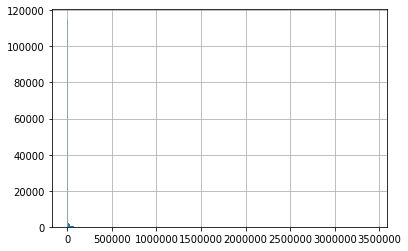

In [143]:
well_vols.gas2co2.hist(bins=500)

In [145]:
well_vols.to_csv('well_volumes.csv')

### Pools
This next section of code aggregates wells into field-area-pools.

In [154]:
pool_vols = well_vols.groupby('poolID').agg(
                Latitude=('Latitude', 'median'),
                Longitude=('Longitude', 'median'),
                WellDepth=('WellDepthAmount', 'median'),
                gas2co2=('gas2co2', 'sum'),
                oil2co2=('oil2co2', 'sum')).reset_index()
pool_vols['totalco2']=pool_vols['gas2co2'] + pool_vols['oil2co2']
pool_vols.head()

# 'API_ID', 'WellStatus_10.30.19', 'WellType_10.30.19', 'OperatorName',
#                     'FieldName', 'AreaName', 'Latitude', 'Longitude', 'SPUDDate',
#                     'PoolCode', 'PoolName', 'PoolWellTypeStatus', 'OperatorStatus','WellDepthAmount',
#                     'HydraulicallyFractured', 'last year', 'Status2020',
#                     'allgas', 'alloil', 'gas2co2', 'oil2co2'

,poolID,Latitude,Longitude,WellDepth,gas2co2,oil2co2,totalco2
0,100001,37.693672,-121.689627,NaN,0.728255,1999.475066,2000.203320
1,120004,37.693731,-121.689699,NaN,27.734360,2820.538058,2848.272418
2,120005,37.695090,-121.689512,NaN,0.000000,1891.207349,1891.207349
3,120008,37.693752,-121.686563,NaN,0.000000,820.406824,820.406824
4,120009,37.694963,-121.686812,NaN,6.129476,3208.595801,3214.725276


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002806B91F608>,
      dtype=object)

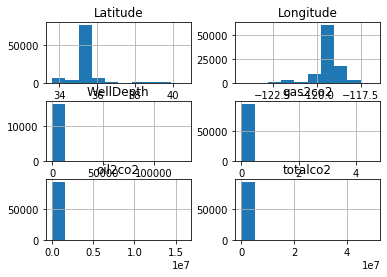

In [155]:
pool_vols.hist()

In [156]:
pool_vols.to_csv('pool_volumes.csv')

THe rest of this code is copied from other decks to measure the total volumes of CO2 coming from emitters.

In [31]:
emissions = pd.read_excel(r'./Emissions by Unit and Fuel Type.xlsx',
                          sheet_name='UNIT_DATA', skiprows=4)
print(list(emissions.columns))
print(emissions.shape)
emissions = emissions[emissions.State == 'CA']
print(emissions.shape)
emsCA2019 = emissions[emissions['Reporting Year'] == 2019]
print(emsCA2019.shape)
# Unique values of Facility ID for 2019 emissions data from facilities in California 
print(len(set(emsCA2019['Facility Id'])))
# Unique values of Facility Name for 2019 emissions data from facilities in California
print(len(set(emsCA2019['Facility Name'])))
# Unique values of FRS ID for 2019 emissions data from facilities in California
print(len(set(emsCA2019['FRS Id'])))
facilities = pd.read_excel(r'./ghgp_data_2019.xlsx',
                          sheet_name='Direct Emitters', skiprows=3)

print(list(facilities.columns))
print(facilities.shape)
facilities = facilities[facilities.State == 'CA']
print(facilities.shape)

print(len(set(facilities['Facility Id'])))
print(len(set(facilities['Facility Name'])))
print(len(set(facilities['FRS Id'])))

ems = set(emsCA2019['Facility Id'])
facs = set(facilities['Facility Id'])

for fac in facs:
    if fac not in ems:
        print('facility id', fac, 'not in emissions data.')
for em in ems:
    if em not in facs:
        print('facility id', em, 'not in facilities data.')

facilitiesB = facilities.rename(inplace=False,
                                columns={'Facility Name':'Facility Name2',
                                         'City':'City2',
                                         'Primary NAICS Code':'Primary NAICS Code2',
                                         'Industry Type (subparts)':'Industry Type (subparts)2',
                                         'Industry Type (sectors)':'Industry Type (sectors)2'})

emsCA2019loc = pd.merge(emsCA2019, facilitiesB[['Facility Id',
#                                               'Facility Name2',
                                               'City2',
                                               'Zip Code',
                                               'Address',
                                               'County',
                                               'Latitude',
                                               'Longitude',
#                                               'Primary NAICS Code2',
                                               'Industry Type (subparts)2',
                                               'Industry Type (sectors)2']],
                        how='left', on='Facility Id')
print(emsCA2019loc.shape)
# tran2_df = pd.merge(tran_df, dupeval_df, how='left', on='value')

['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State', 'Primary NAICS Code', 'Reporting Year', 'Industry Type (subparts)', 'Industry Type (sectors)', 'Unit Name', 'Unit Type', 'Unit Reporting Method', 'Unit Maximum Rated Heat Input Capacity (mmBTU/hr)', 'Unit CO2 emissions (non-biogenic) ', 'Unit Methane (CH4) emissions ', 'Unit Nitrous Oxide (N2O) emissions ', 'Unit Biogenic CO2 emissions (metric tons)']
(190709, 17)
(10279, 17)
(927, 17)
298
295
368
['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State', 'Zip Code', 'Address', 'County', 'Latitude', 'Longitude', 'Primary NAICS Code', 'Industry Type (subparts)', 'Industry Type (sectors)', 'Total reported direct emissions', 'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ', 'Nitrous Oxide (N2O) emissions ', 'HFC emissions', 'PFC emissions', 'SF6 emissions ', 'NF3 emissions', 'Other Fully Fluorinated GHG emissions', 'HFE emissions', 'Very Short-lived Compounds emissions', 'Other GHGs (metric tons CO2e)', 'Biogenic CO2 

In [32]:
emsCA2019loc.columns

Index(['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State',
       'Primary NAICS Code', 'Reporting Year', 'Industry Type (subparts)',
       'Industry Type (sectors)', 'Unit Name', 'Unit Type',
       'Unit Reporting Method',
       'Unit Maximum Rated Heat Input Capacity (mmBTU/hr)',
       'Unit CO2 emissions (non-biogenic) ', 'Unit Methane (CH4) emissions ',
       'Unit Nitrous Oxide (N2O) emissions ',
       'Unit Biogenic CO2 emissions (metric tons)', 'City2', 'Zip Code',
       'Address', 'County', 'Latitude', 'Longitude',
       'Industry Type (subparts)2', 'Industry Type (sectors)2'],
      dtype='object')

In [34]:
emsCA2019loc['Unit CO2 emissions (non-biogenic) '].sum()

59638912.489999995